In [6]:
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import pandas as pd

In [9]:
#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [85]:
file_path = "C:/박규영/축구포트폴리오/백성동-modified.png"
fdj_cropped = Image.open(file_path)

In [69]:
df = pd.read_csv("C:/박규영/축구포트폴리오/2023K리그데이터포털/전처리/2023_K리그_데이터최종본.csv", encoding='cp949')

In [70]:
df['총패스'] = df['숏패스시도'] + df['롱패스시도'] + df['중거리패스시도']

In [8]:
df.columns

Index(['선수명', '포지션', '상세 포지션', '신장', '생년월일', '구단', '번호', '리그', '출전시간', '득점',
       '도움', '슈팅', '유효슈팅', '차단된 슈팅', '벗어난 슈팅', 'PA내 슈팅', 'PA 외 슈팅', '오프사이드',
       '프리킥', '코너킥', '스로인', '드리블시도', '드리블성공', '키패스', '전방패스 시도', '전방패스성공',
       '후방패스시도', '후방패스성공', '횡패스성공', '공격지역패스시도', '공격지역패스성공', '수비지역패스시도',
       '수비지역패스성공', '롱패스시도', '롱패스성공', '중거리패스시도', '중거리패스성공', '숏패스시도', '숏패스성공',
       '크로스시도', '크로스성공', '탈압박', '경합지상시도', '경합지상성공', '경합공중시도', '경합공중성공', '태클시도',
       '태클성공', '클리어링', '인터셉트', '차단', '획득', '블락', '볼미스', '파울', '피파울', '경고',
       '퇴장'],
      dtype='object')

In [71]:
dong = df[df['선수명'] =='백성동']
dong

,선수명,포지션,상세 포지션,신장,생년월일,구단,번호,리그,출전시간,득점,...,인터셉트,차단,획득,블락,볼미스,파울,피파울,경고,퇴장,총패스
338,백성동,MF,MF,171Cm,1991,포항,10,리그1,1492,4,...,14,13,76,25,14,10,12,1,0,417


In [79]:
import warnings
warnings.filterwarnings('ignore')

dong['유효슈팅전환율'] = round(dong['유효슈팅']/dong['슈팅'] * 100)
dong['득점점환율'] = round(dong['득점']/dong['슈팅'] * 100)
dong['슈팅생산율'] = round((dong['슈팅']-dong['차단된 슈팅'])/dong['슈팅'] * 100)
dong['PA내 득점율'] = round(dong['득점']/dong['PA내 슈팅'] * 100)
dong['PA외 득점율'] = round(dong['득점']/dong['PA 외 슈팅'] * 100)

dong['도움전환율'] = round(dong['도움']/dong['키패스'] * 100)
dong['키패스전환율'] = round(dong['키패스']/dong['총패스'] * 100)
dong['공격지역패스성공률'] = round(dong['공격지역패스성공']/dong['공격지역패스시도'] * 100)
dong['전방패스성공률'] = round(dong['전방패스성공']/dong['전방패스 시도'] * 100)
dong['중거리패스성공률'] = round(dong['중거리패스성공']/dong['중거리패스시도'] * 100)

dong['크로스성공률'] = round(dong['크로스성공']/dong['크로스시도'] * 100)
dong['지상경합성공률'] = round(dong['경합지상성공']/dong['경합지상시도'] * 100)
dong['드리블성공률'] = round(dong['드리블성공']/dong['드리블시도'] * 100)
dong['공중경합성공률'] = round(dong['경합공중성공']/dong['경합공중시도'] * 100)
dong['태클성공률'] = round(dong['태클성공']/dong['태클시도'] * 100)

In [73]:
dong.columns[-15:]

Index(['유효슈팅전환율', '득점점환율', '슈팅생산율', 'PA내 득점율', 'PA외 득점율', '도움전환율', '키패스전환율',
       '공격지역패스성공률', '전방패스성공률', '중거리패스성공률', '크로스성공률', '지상경합성공률', '드리블성공률',
       '공중경합성공률', '태클성공률'],
      dtype='object')

In [74]:
param_kor = ['유효슈팅전환율', '득점점환율', '슈팅생산율', 'PA내 득점율', 'PA외 득점율', '도움전환율', '키패스전환율',
           '공격지역패스성공률', '전방패스성공률', '중거리패스성공률', '크로스성공률', '지상경합성공률', '드리블성공률',
           '공중경합성공률', '태클성공률']

params = ["shot on taget conversion rate", "scoring point exchange rate", "shooting production rate", "scoring rate within PA", "scoring rate other than PA", 
          "help conversion rate", "key pass conversion rate",
          'Attack Area Pass Succ Rate', 'Front Pass Succ Rate', 'Medium Distance Pass Succ Rate', 
          'Cross Succ Rate', 'Ground Competition Succ Rate', 'Dribble Succ Rate',
          "Succ rate of competition in the air", "Tackle succ rate"]

In [80]:
dong[param_kor]

,유효슈팅전환율,득점점환율,슈팅생산율,PA내 득점율,PA외 득점율,도움전환율,키패스전환율,공격지역패스성공률,전방패스성공률,중거리패스성공률,크로스성공률,지상경합성공률,드리블성공률,공중경합성공률,태클성공률
338,39.0,14.0,71.0,27.0,31.0,26.0,6.0,81.0,60.0,84.0,29.0,25.0,43.0,57.0,43.0


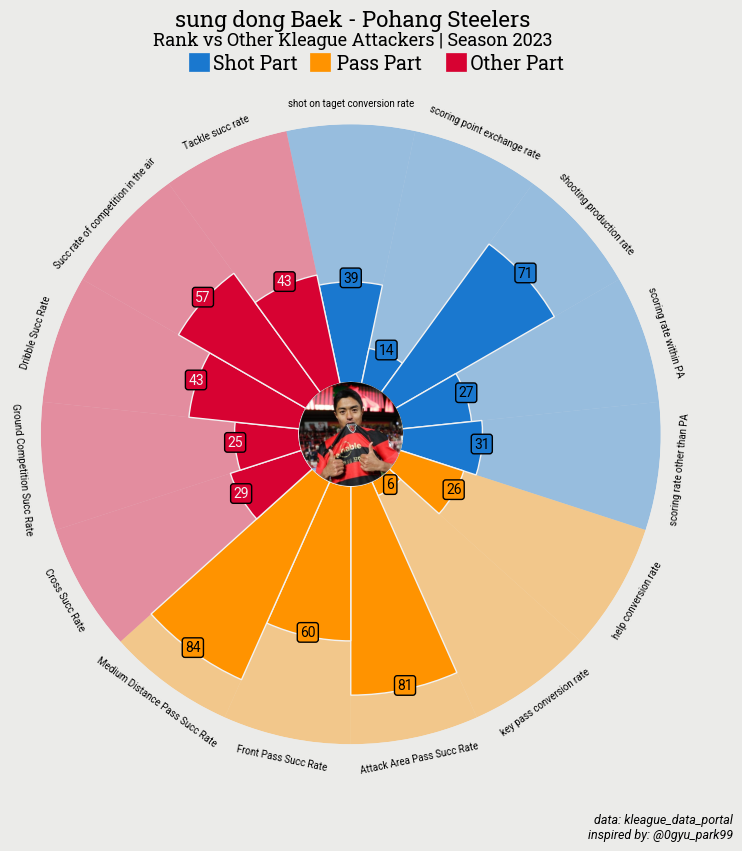

In [86]:
# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [39,14,71,27,31,26,6,81,60,84,29,25,43,57,43]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=7,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=10,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "sung dong Baek - Pohang Steelers", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Rank vs Other Kleague Attackers | Season 2023",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: kleague_data_portal"
CREDIT_2 = "inspired by: @0gyu_park99"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Shot Part        Pass Part          Other Part", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()